In [7]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

DATA_PATH = './patients-covid19-saitama.csv'

data = pd.read_csv(DATA_PATH)
data.head()

,No.,判明日,年代,性別,居住地,現状
0,1,2020/2/1,30代,男性,埼玉県外,退院
1,2,2020/2/10,40代,男性,埼玉県,退院
2,3,2020/2/14,-,-,埼玉県外,退院
3,4,2020/2/21,未就学児,男性,埼玉県,退院
4,5,2020/3/5,60代,男性,行田市,退院


In [8]:
data = data.reindex(data["No."])
data = data.drop(columns=["No."])
data.head()

,判明日,年代,性別,居住地,現状
No.,,,,,
1,2020/2/10,40代,男性,埼玉県,退院
2,2020/2/14,-,-,埼玉県外,退院
3,2020/2/21,未就学児,男性,埼玉県,退院
4,2020/3/5,60代,男性,行田市,退院
5,2020/3/5,50代,男性,上尾市,退院


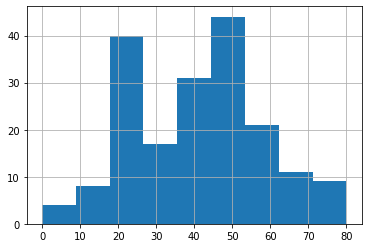

In [20]:
# 年齢毎のヒストグラムを表示する
age = data["年代"]
def convert_age_from_str_to_float(str_age):
    """ 文字列の年代を数値に変換する
    """
    if type(str_age) is str and str_age != "-":
        if str_age == "未就学児":
            return 0
        age = int(re.sub("\\D", "", str_age))
        return age
    else:
        return None

age = age.apply(convert_age_from_str_to_float)
age = age.dropna()
hist = age.hist(bins=9)